# VGG-16 Model 1a
## Preprocessing method: ImageDataGenerator()
## Image size: (224, 224) 
## Images: RGB
## Unfrozen pretrained layers
## Image transformation

In [1]:
import pandas as pd
import numpy as np
import io
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [2]:
from keras import backend as K
K.clear_session()

In [3]:
path_training = 'gender_images/Training/'
path_validation = 'gender_images/Validation/'

In [4]:
image_size = (224, 224)
batch_size = 128

datagen_transform = ImageDataGenerator(
    rescale =1./255,
    validation_split=.2,
    rotation_range=20,
    width_shift_range=.2,
    height_shift_range=.2,
    shear_range=.2,
    zoom_range=.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

datagen_val = ImageDataGenerator(
    rescale = 1./255,
)

train_ds = datagen_transform.flow_from_directory(
    path_training,
    seed=1993,
    target_size=image_size,
    batch_size=batch_size,
    classes=['female','male'],
    shuffle=True,
    color_mode="rgb"
)

val_ds = datagen_transform.flow_from_directory(
    path_validation,
    seed=1993,
    target_size=image_size,
    batch_size=batch_size,
    classes=['female','male'],
    shuffle=True,
    color_mode="rgb"
)

Found 47009 images belonging to 2 classes.
Found 11649 images belonging to 2 classes.


In [5]:
vgg_model = keras.applications.VGG16(weights='imagenet', include_top=True)
vgg_model.trainable = True

# Model layers
input_tensor = tf.keras.layers.Input(shape=(224, 224, 3))
x = vgg_model(input_tensor)
out = keras.layers.Dense(2, activation='sigmoid')(x)

# Set early stopping after certain number of epochs
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
epochs=500     # Set epochs

# Generate model
model = keras.Model(inputs = input_tensor, outputs = out)
model.compile(optimizer=keras.optimizers.Adam(1e-2),
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, 1000)              138357544 
                                                                 
 dense (Dense)               (None, 2)                 2002      
                                                                 
Total params: 138,359,546
Trainable params: 138,359,546
Non-trainable params: 0
_________________________________________________________________


In [6]:
vgg16_fit = model.fit(train_ds, 
                      epochs=epochs, 
                      validation_data=val_ds,
                      callbacks=[callback],
                      workers=12)

Epoch 1/500
368/368 [==============================] - 260s 625ms/step - loss: 0.6933 - accuracy: 0.5043 - val_loss: 0.6934 - val_accuracy: 0.4986
Epoch 2/500
368/368 [==============================] - 221s 587ms/step - loss: 0.6933 - accuracy: 0.5034 - val_loss: 0.6940 - val_accuracy: 0.4986
Epoch 3/500
368/368 [==============================] - 220s 593ms/step - loss: 0.6933 - accuracy: 0.5018 - val_loss: 0.6932 - val_accuracy: 0.5014
Epoch 4/500
368/368 [==============================] - 220s 591ms/step - loss: 0.6933 - accuracy: 0.5021 - val_loss: 0.6932 - val_accuracy: 0.5014
Epoch 5/500
368/368 [==============================] - 220s 591ms/step - loss: 0.6933 - accuracy: 0.5030 - val_loss: 0.6935 - val_accuracy: 0.4986
Epoch 6/500
368/368 [==============================] - 219s 590ms/step - loss: 0.6931 - accuracy: 0.5032 - val_loss: 0.6934 - val_accuracy: 0.4986
Epoch 7/500
368/368 [==============================] - 220s 591ms/step - loss: 0.6934 - accuracy: 0.5039 - val_loss: 0

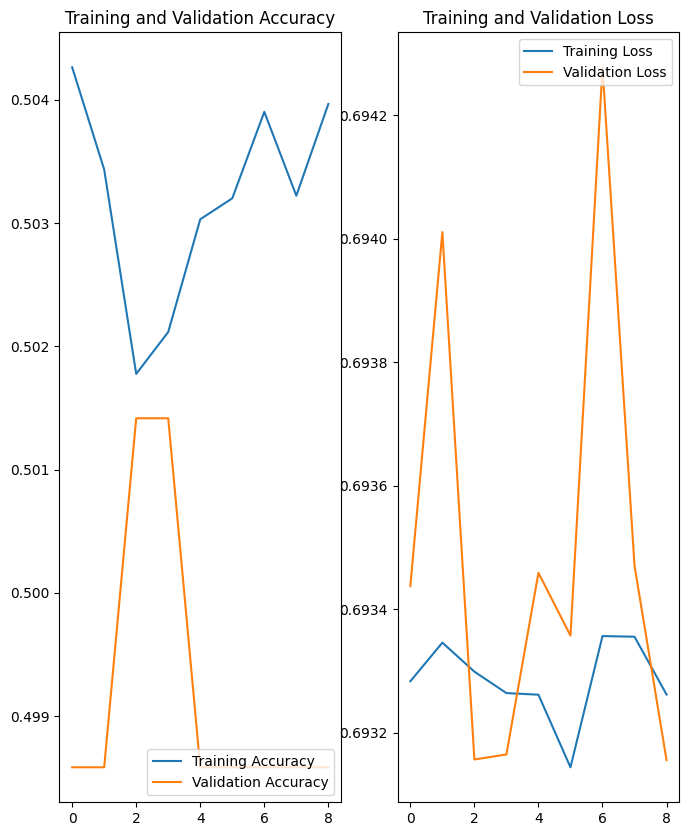

In [7]:
acc= vgg16_fit.history['accuracy']
val_acc = vgg16_fit.history['val_accuracy']

loss = vgg16_fit.history['loss']
val_loss = vgg16_fit.history['val_loss']

epochs_range = range(0, 9)

plt.figure(figsize=(8, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [8]:
print(str('Top Training Accuracy: ') + str(round(max(acc),4)))
print(str('Top Validation Accuracy: ') + str(round(max(val_acc),4)))

Top Training Accuracy: 0.5043
Top Validation Accuracy: 0.5014


In [9]:
model.save('GC weights/Unfrozen/mod1a-RGB/mod1a_RGB_unfrozen.h5')